# Descriptive Statistics

In [1]:
#!pip install scipy

In [2]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# when using notebooks
%matplotlib inline

df = pd.read_csv('./penguins.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [3]:
df.shape

(344, 7)

In [4]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [5]:
# for simplicity we are going to use forward fill here but 
# we will discuss different strategies of how to deal with
# missing values later on

df = df.fillna(method='ffill')

In [6]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [11]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

---

#### Type of variables

species: Categorical

island: Categorical

bill_length_mm: Metric

bill_length_mm: Metric

flipper_length_mm: Metric

body_mass_g: Metric

sex: Categorical

---

In [10]:
## arithmetic mean
mean = df.mean()
mean

bill_length_mm         43.920930
bill_depth_mm          17.143605
flipper_length_mm     200.936047
body_mass_g          4201.090116
dtype: float64

In [11]:
## median
median = df.median()
median

bill_length_mm         44.45
bill_depth_mm          17.30
flipper_length_mm     197.00
body_mass_g          4050.00
dtype: float64

In [12]:
df.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
dtype: float64

In [42]:
## mode
df.mode(numeric_only=False)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male


In [14]:
## Variance
df['bill_depth_mm'].var()

3.9138365312902548

In [15]:
## Standard Deviation
df['bill_depth_mm'].std()

1.9783418641100063

In [16]:
np.sqrt(df['bill_depth_mm'].var())

1.9783418641100063

In [43]:
## Range
df['bill_depth_mm'].max() - df['bill_depth_mm'].min()

8.4

In [45]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [18]:
## IQR
df['bill_depth_mm'].quantile(0.75) - df['bill_depth_mm'].quantile(0.25)

3.125

In [19]:
stats.iqr(df['bill_depth_mm'], rng=(25, 75))

3.125

<AxesSubplot:>

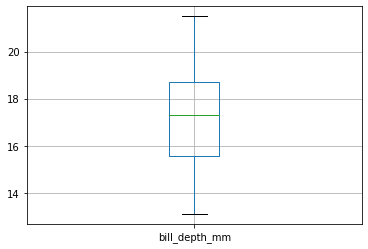

In [20]:
## Boxplot
df.boxplot('bill_depth_mm')

### Distributions 

#### Univariate distributions

Frequency table: `.value_counts()`

Histogram: `.hist()`


#### Multivariate distributions

Categorical and Ordinal Variables: `crosstab()`

Metric Variables: `corr()`

In [21]:
df.sex.value_counts(normalize=True)

male      0.514535
female    0.485465
Name: sex, dtype: float64

#### Look at histograms

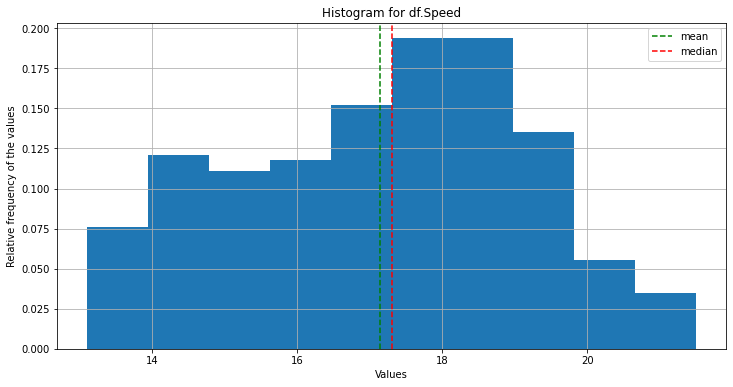

In [12]:
df.bill_depth_mm.hist(figsize=(12,6), density=True, bins=10)
plt.title('Histogram for df.Speed')
plt.xlabel('Values')
plt.ylabel('Relative frequency of the values')
plt.axvline(df.bill_depth_mm.mean(), c='g', linestyle='--', label='mean')
plt.axvline(df.bill_depth_mm.median(), c='r', linestyle='--', label='median')
plt.legend()
plt.show()

In [23]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [49]:
# Crosstab
pd.crosstab(df.body_mass_g, df.flipper_length_mm, normalize='all', margins=True)

flipper_length_mm,172.0,174.0,176.0,178.0,179.0,180.0,181.0,182.0,183.0,184.0,...,222.0,223.0,224.0,225.0,226.0,228.0,229.0,230.0,231.0,All
body_mass_g,,,,,,,,,,,,,,,,,,,,,
2700.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002924
2850.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.002924,0.000000,0.000000,0.002924,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005848
2900.0,0.000000,0.000000,0.000000,0.002924,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011696
2925.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002924
2975.0,0.000000,0.000000,0.000000,0.000000,0.002924,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.002924,0.000000,0.000000,0.000000,0.000000,0.002924,0.000000,0.000000,0.005848
6000.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.002924,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005848
6050.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002924,0.000000,0.002924


In [50]:
crosstab_data = pd.crosstab(df.body_mass_g, df.flipper_length_mm, normalize='all', margins=True)

In [65]:
crosstab_data.max()

flipper_length_mm
172.0    0.002924
174.0    0.002924
176.0    0.002924
178.0    0.011696
179.0    0.002924
180.0    0.014620
181.0    0.020468
182.0    0.008772
183.0    0.005848
184.0    0.020468
185.0    0.026316
186.0    0.020468
187.0    0.046784
188.0    0.017544
189.0    0.020468
190.0    0.064327
191.0    0.038012
192.0    0.020468
193.0    0.043860
194.0    0.014620
195.0    0.049708
196.0    0.029240
197.0    0.029240
198.0    0.023392
199.0    0.017544
200.0    0.011696
201.0    0.017544
202.0    0.011696
203.0    0.014620
205.0    0.008772
206.0    0.002924
207.0    0.005848
208.0    0.023392
209.0    0.014620
210.0    0.040936
211.0    0.005848
212.0    0.020468
213.0    0.017544
214.0    0.017544
215.0    0.035088
216.0    0.023392
217.0    0.017544
218.0    0.014620
219.0    0.014620
220.0    0.023392
221.0    0.014620
222.0    0.017544
223.0    0.005848
224.0    0.008772
225.0    0.011696
226.0    0.002924
228.0    0.011696
229.0    0.005848
230.0    0.020468
231.0    0

In [51]:
import seaborn as sns

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

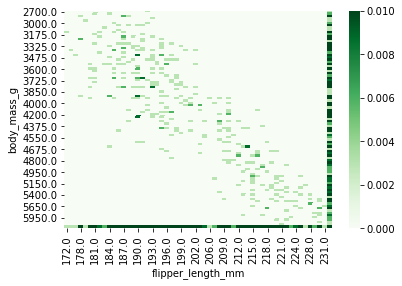

In [70]:
sns.heatmap(crosstab_data, cmap='Greens', vmin=0, vmax=0.01)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

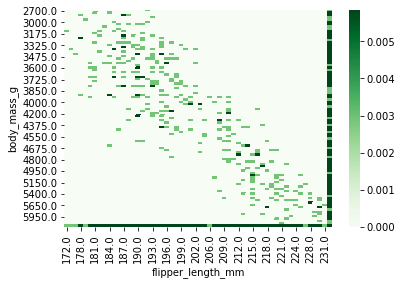

In [71]:
sns.heatmap(crosstab_data, cmap='Greens', robust=True)

### Correlations

In [25]:
correlations = df.corr()
correlations

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.237563,0.656864,0.596365
bill_depth_mm,-0.237563,1.000000,-0.585477,-0.474244
flipper_length_mm,0.656864,-0.585477,1.000000,0.870961
body_mass_g,0.596365,-0.474244,0.870961,1.000000


In [26]:
import seaborn as sns

<AxesSubplot:>

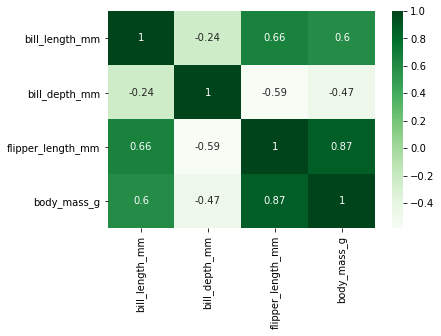

In [27]:
sns.heatmap(correlations, annot=True, cmap='Greens')

# ALEX ''''

### Penguins Statistical Observation

In [1]:
# Read in the Penguins Dataset with pandas.

# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# when using notebooks
%matplotlib inline

df = pd.read_csv('./penguins.csv')
df.head()
df
#df['island'].hist(df['body_mass_g'])

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


<AxesSubplot:xlabel='island,sex'>

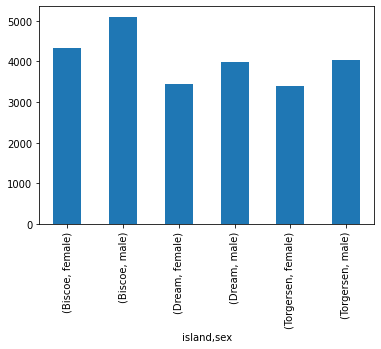

In [2]:
df.groupby(['island', 'sex'])['body_mass_g'].mean().plot.bar()
df.groupby(['island', 'sex'])['body_mass_g'].mean().plot.bar()

AttributeError: 'AxesSubplot' object has no attribute 'rowNum'

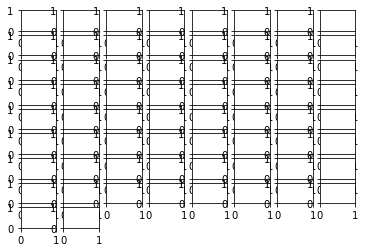

In [125]:
df[df['sex'] == 'male'].island.hist(by = df['body_mass_g'], density=True, bins=10)
#df[df['sex'] == 'female'].island.hist( density=True, bins=10)
plt.title('Histogram for df.Speed')
plt.xlabel('Values')
plt.ylabel('Relative frequency of the values')
plt.legend()
plt.show()

In [78]:
#X = ['Torgersen', 'Biscoe','Dream']
#X_axis = np.arange(len(X))
df[(df['sex'] == 'male') & (df['island'] == 'Torgersen')].mean()[3]
df[(df['sex'] == 'female') & (df['island'] == 'Torgersen')].mean()[3]
#df[df['sex'] == 'female']['island'].mean()
#plt.bar(X_axis - 0.2, )
#plt.bar(X_axis + 0.2, )

3390.0

In [51]:
mean1 = df[(df['sex'] == 'male') & (df['island'] == 'Torgersen')].mean()
mean2 = df[(df['sex'] == 'female') & (df['island'] == 'Torgersen')].mean()
mean1[3]

bill_length_mm         40.192593
bill_depth_mm          19.211111
flipper_length_mm     193.777778
body_mass_g          3982.407407
dtype: float64

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#
# sns.histplot(df, x="island", hue="Body Mass (gr)")

In [ ]:
plt.figure(figsize=(8,6))
#plt.hist(data1, bins=100, alpha=0.5, label="data1")
#plt.hist(data2, bins=100, alpha=0.5, label="data2")

### Lifeexpectancy Encounter

In [83]:
# 1. read the file into pandas
import pandas as pd

df = pd.read_excel('./gapminder_lifeexpectancy.xlsx', index_col=0)
life = df[1960].dropna()
df = df.fillna(method='ffill')


In [84]:
df.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Life expectancy,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Akrotiri and Dhekelia,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [85]:
df.mean()

1800    31.271776
1801    31.164170
1802    31.175444
1803    31.187375
1804    31.240811
          ...    
2012    71.253900
2013    71.526448
2014    71.709614
2015    71.940811
2016    72.174865
Length: 217, dtype: float64

In [86]:
# 3. calculate the median
df.median()

1800    31.5
1801    31.3
1802    31.2
1803    31.3
1804    31.4
        ... 
2012    72.7
2013    73.0
2014    73.1
2015    73.2
2016    73.3
Length: 217, dtype: float64

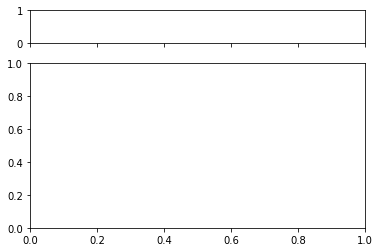

In [94]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df.mean()
median=df.median()

#sns.boxplot(data=df,  ax=ax_box)
#ax_box.axvline(mean, color='r', linestyle='--')
#ax_box.axvline(median, color='g', linestyle='-')
#
#sns.histplot(data=df, ax=ax_hist, kde=True)
#ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
#ax_hist.axvline(median, color='g', linestyle='-', label="Median")
#
#ax_hist.legend()
#
#ax_box.set(xlabel='')
plt.show()

In [97]:
# 4. calculate the standard deviation
df.std()

1800    3.685703
1801    3.737661
1802    3.834263
1803    3.791201
1804    3.774263
          ...   
2012    8.150913
2013    8.040446
2014    7.981972
2015    7.829316
2016    7.689416
Length: 217, dtype: float64

In [98]:
# 5. calculate the variance
df.var()

1800    13.584406
1801    13.970112
1802    14.701569
1803    14.373204
1804    14.245063
          ...    
2012    66.437380
2013    64.648766
2014    63.711876
2015    61.298189
2016    59.127119
Length: 217, dtype: float64

In [99]:
# 6. find the highest/lowest life expectancy
df.max()

1800    42.85
1801    40.30
1802    44.37
1803    44.84
1804    42.83
        ...  
2012    84.70
2013    84.80
2014    84.80
2015    84.80
2016    84.80
Length: 217, dtype: float64

In [100]:
# 7. find the highest/lowest life expectancy
df.min()

1800    23.39
1801    23.39
1802    23.39
1803    19.60
1804    23.39
        ...  
2012    46.10
2013    45.60
2014    45.40
2015    47.10
2016    48.86
Length: 217, dtype: float64

In [101]:
# 8. find the 90% quantile
## IQR
df.quantile(0.90)

1800    36.020
1801    35.920
1802    35.920
1803    35.906
1804    35.924
         ...  
2012    80.700
2013    80.960
2014    81.036
2015    81.060
2016    81.140
Name: 0.9, Length: 217, dtype: float64

In [111]:
# 9. store the number of data points in a variable
table = df.describe().sum(axis=1)[0]
table
#data_points = 

56203.0